<a href="https://colab.research.google.com/github/Anisha-Tasneem/Customer-Segmentation-and-Data-Analysis-using-Social-Media/blob/main/K-means%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

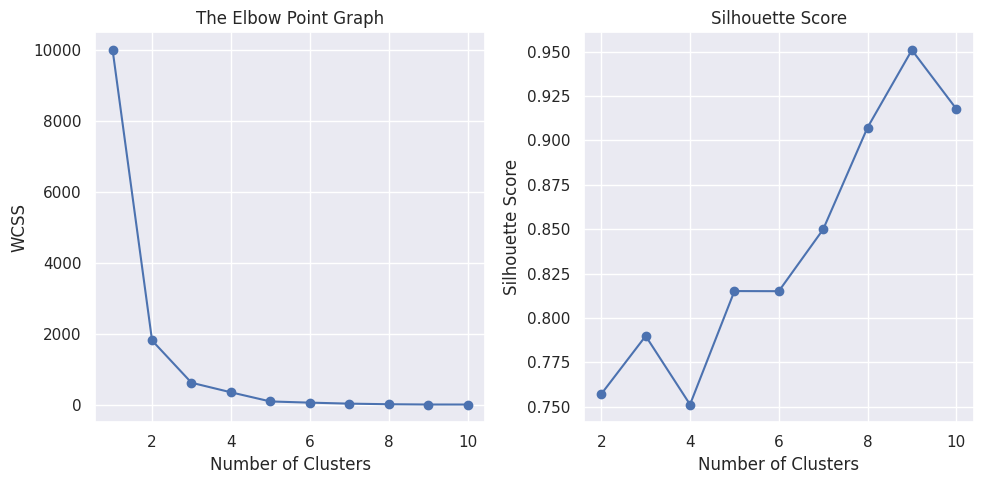

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Customer ID,Gender,Age,City Code,Product Code,Total Bill (Taka),Customer Value,Cluster
0,1,Female,19,3.0,9,9120,1,1
1,2,Female,27,4.0,2,6110,0,0
2,3,Female,34,2.0,4,7010,0,0
3,4,Female,42,2.0,6,10710,1,1
4,5,Female,33,16.0,8,7620,1,2


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

# Load the CSV file
csv_path = "/content/drive/MyDrive/499B-datasets/Dataset-for-modeling.csv"
customer_data = pd.read_csv(csv_path)

# Display the first few rows of the dataframe
customer_data.head()

# Extract relevant columns for clustering
columns_for_clustering= ['Total Bill (Taka)', 'Customer Value']
X = customer_data [columns_for_clustering]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
max_clusters = 10

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    if i > 1:
        silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow method
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Choose the optimal number of clusters based on the elbow method
optimal_clusters =3

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustered data
customer_data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

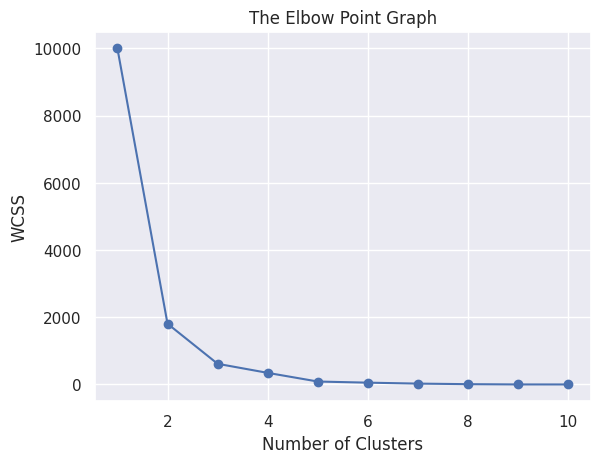

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Total Bill (Taka)  Customer Value  Cluster
0                  9120               1        1
1                  6110               0        0
2                  7010               0        0
3                 10710               1        1
4                  7620               1        2
...                 ...             ...      ...
4995              10710               1        1
4996               9120               1        1
4997               9620               1        1
4998               6060               0        0
4999              10710               1        1

[5000 rows x 3 columns]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load your dataset
# Replace 'your_file.csv' with the actual file name or path
customer_data = pd.read_csv('/content/drive/MyDrive/499B-datasets/Dataset-for-modeling.csv')

# Extract relevant columns for clustering
columns_for_clustering = ['Total Bill (Taka)', 'Customer Value']
X = customer_data[columns_for_clustering]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


# Specify your own range of clusters
min_clusters = 1
max_clusters = 20

# Calculate WCSS for different number of clusters
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
sns.set()
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters based on the elbow method
optimal_clusters = 3  # Replace with the value you determine from the plot

# Apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clustered data
print(customer_data[['Total Bill (Taka)', 'Customer Value', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


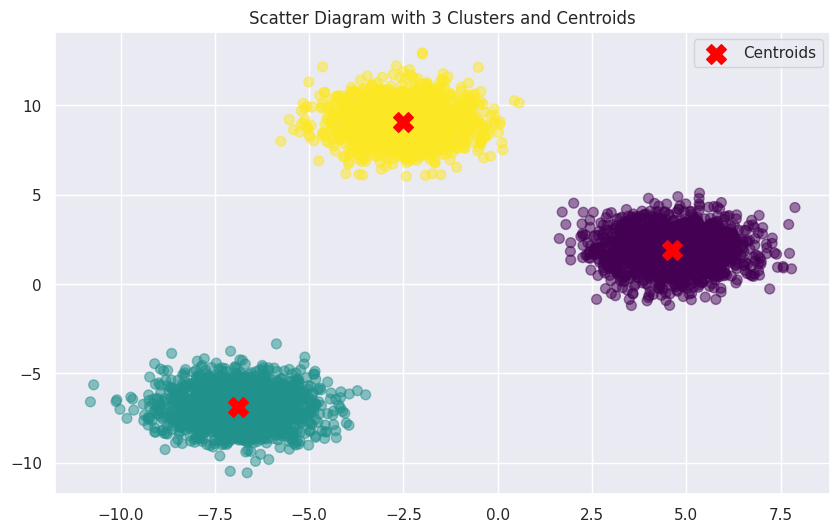

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data with 3 clusters
X, _ = make_blobs(n_samples=5000, centers=3, cluster_std=1.0, random_state=42)

# Perform K-means clustering to get cluster centroids
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Plot the scatter diagram with data points and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

plt.title('Scatter Diagram with 3 Clusters and Centroids')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


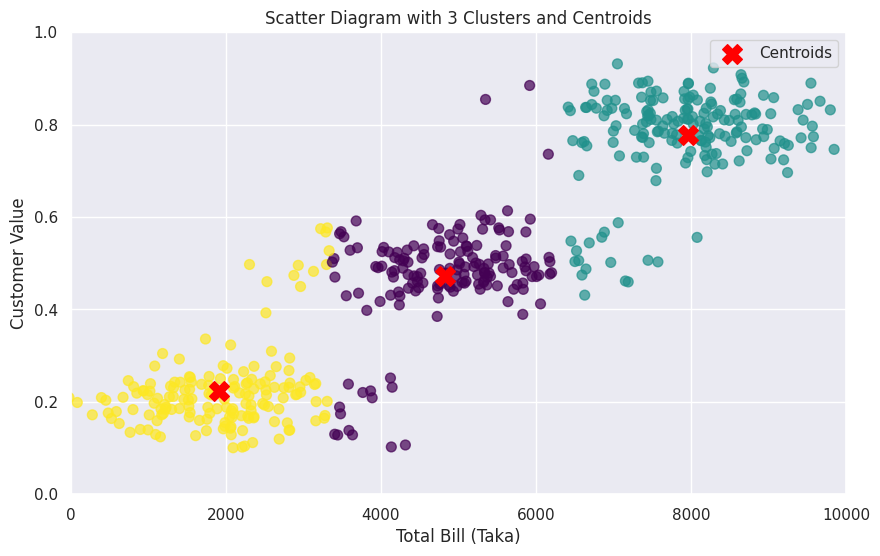

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data with 3 clusters within specified ranges
n_samples = 500
centers = [(2000, 0.2), (5000, 0.5), (8000, 0.8)]  # Define cluster centers within range
cluster_std = [(1000, 0.05), (1000, 0.05), (1000, 0.05)]  # Standard deviation for each cluster

# Generate data points
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Perform K-means clustering to get cluster centroids
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Plot the scatter diagram with data points and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

# Set axis ranges
plt.xlim(0, 10000)
plt.ylim(0, 1)

# Add title and labels
plt.title('Scatter Diagram with 3 Clusters and Centroids')
plt.xlabel('Total Bill (Taka)')
plt.ylabel('Customer Value')

# Display legend
plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


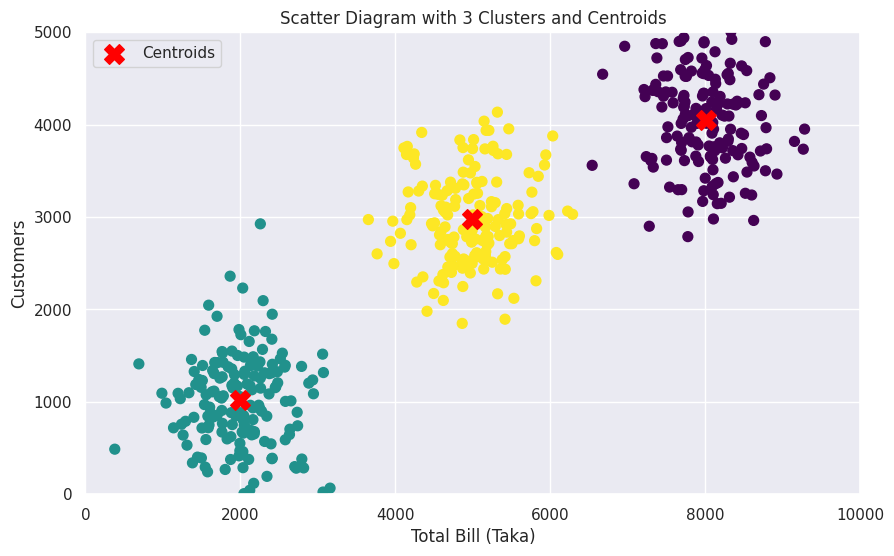

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data with 3 clusters within specified ranges
n_samples = 500
centers = [(2000, 1000), (5000, 3000), (8000, 4000)]  # Define cluster centers within range
cluster_std = [500, 500, 500]  # Standard deviation for each cluster

X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Perform K-means clustering to get cluster centroids
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Plot the scatter diagram with data points and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=1)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

# Set axis ranges
plt.xlim(0, 10000)
plt.ylim(0, 5000)

# Add title and labels
plt.title('Scatter Diagram with 3 Clusters and Centroids')
plt.xlabel('Total Bill (Taka)')
plt.ylabel('Customers')

# Display legend
plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


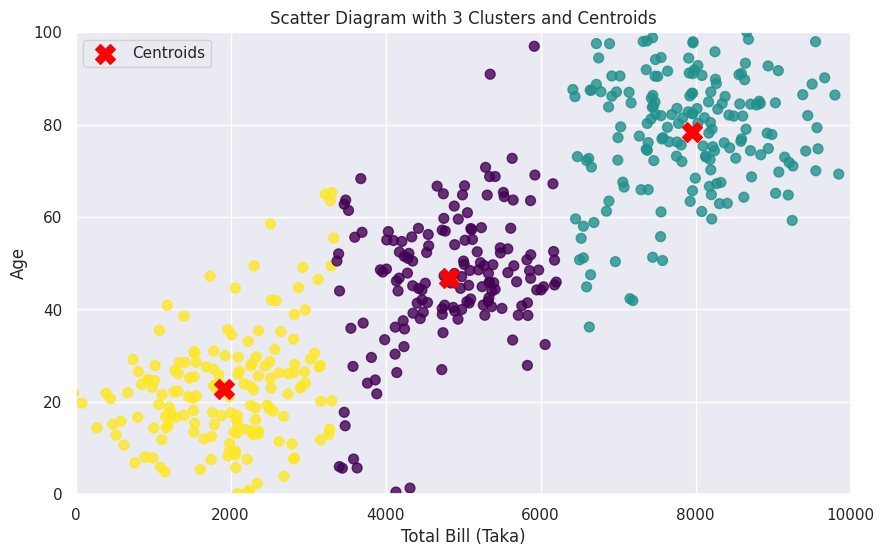

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data with 3 clusters within specified ranges
n_samples = 500
centers = [(2000, 20), (5000, 50), (8000, 80)]  # Define cluster centers within range
cluster_std = [(1000, 10), (1000, 10), (1000, 10)]  # Standard deviation for each cluster

# Generate data points
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Perform K-means clustering to get cluster centroids
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Plot the scatter diagram with data points and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

# Set axis ranges
plt.xlim(0, 10000)
plt.ylim(0, 100)

# Add title and labels
plt.title('Scatter Diagram with 3 Clusters and Centroids')
plt.xlabel('Total Bill (Taka)')
plt.ylabel('Age')

# Display legend
plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


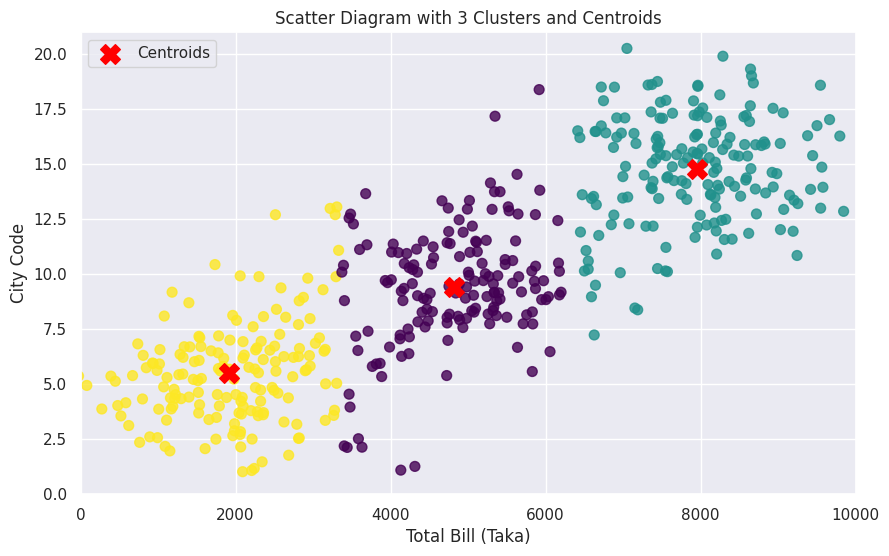

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data with 3 clusters within specified ranges
n_samples = 500
centers = [(2000, 5), (5000, 10), (8000, 15)]  # Define cluster centers within range
cluster_std = [(1000, 2), (1000, 2), (1000, 2)]  # Standard deviation for each cluster

# Generate data points
X, _ = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std, random_state=42)

# Perform K-means clustering to get cluster centroids
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_

# Plot the scatter diagram with data points and centroids
plt.figure(figsize=(10, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.8)

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

# Set axis ranges
plt.xlim(0, 10000)
plt.ylim(0, 21)

# Add title and labels
plt.title('Scatter Diagram with 3 Clusters and Centroids')
plt.xlabel('Total Bill (Taka)')
plt.ylabel('City Code')

# Display legend
plt.legend()

# Add grid
plt.grid(True)

# Show plot
plt.show()

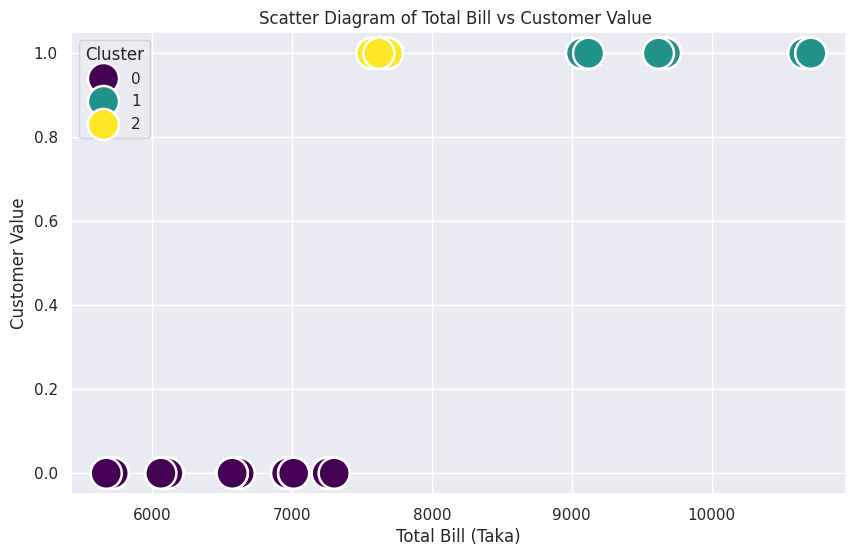

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,6))

# Scatter plot with different colors for each cluster
sns.scatterplot(x='Total Bill (Taka)', y='Customer Value', hue='Cluster', data=customer_data, palette='viridis', s=500)

plt.title('Scatter Diagram of Total Bill vs Customer Value ')
plt.xlabel('Total Bill (Taka)')
plt.ylabel('Customer Value')
plt.legend(title='Cluster')

plt.show()

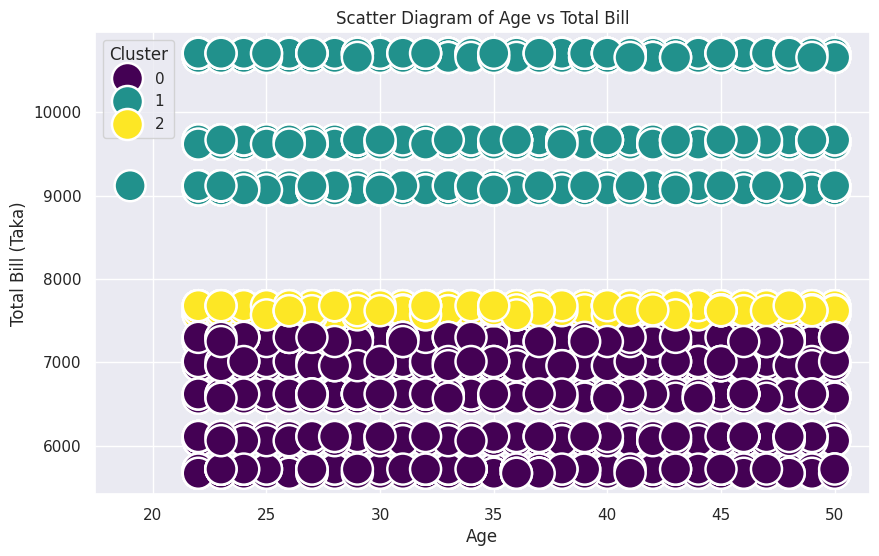

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter plot with different colors for each cluster
sns.scatterplot(x='Age', y='Total Bill (Taka)', hue='Cluster', data=customer_data, palette='viridis', s=500)

plt.title('Scatter Diagram of Age vs Total Bill')
plt.xlabel('Age')
plt.ylabel('Total Bill (Taka)')
plt.legend(title='Cluster')
plt.show()

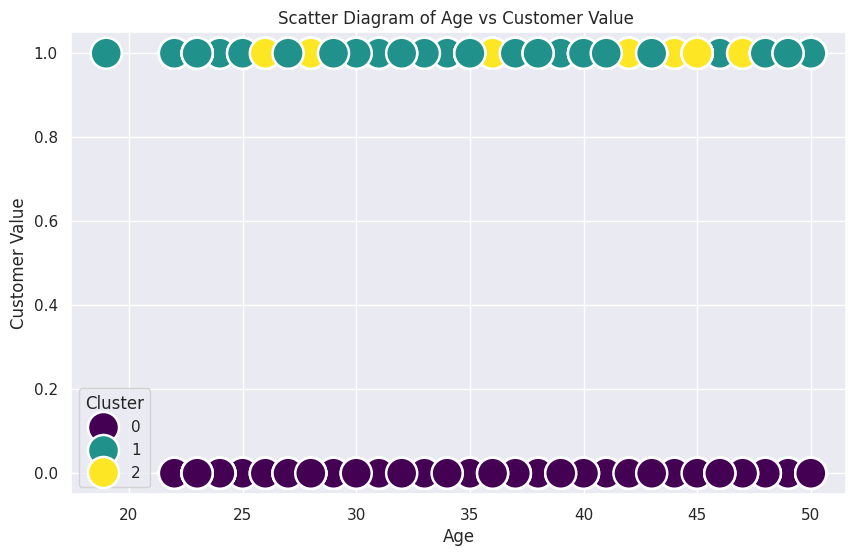

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter plot with different colors for each cluster
sns.scatterplot(x='Age', y='Customer Value', hue='Cluster', data=customer_data, palette='viridis', s=500)

plt.title('Scatter Diagram of Age vs Customer Value ')
plt.xlabel('Age')
plt.ylabel('Customer Value')
plt.legend(title='Cluster')
plt.show()

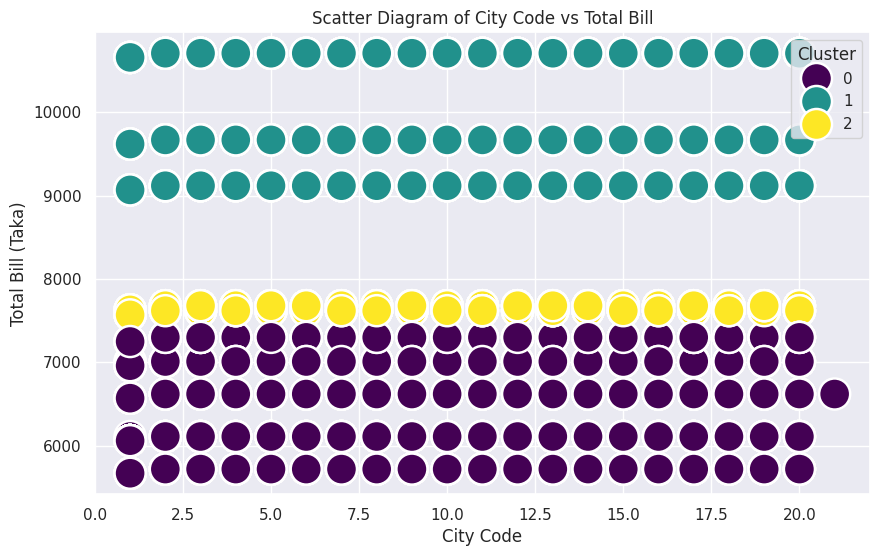

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Scatter plot with different colors for each cluster
sns.scatterplot(x='City Code', y='Total Bill (Taka)', hue='Cluster', data=customer_data, palette='viridis', s=500)

plt.title('Scatter Diagram of City Code vs Total Bill')
plt.xlabel('City Code')
plt.ylabel('Total Bill (Taka)')
plt.legend(title='Cluster')
plt.show()